<a href="https://colab.research.google.com/github/ZeeshanAhmed95/MNIST-Classification-Keras/blob/main/MNIST_Classification_using_Sklearn_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Approach :**
1. **Load all the libraries and Data**
2. **Data Preparations**
3. **Data Visualization**
4. **Analysis** -
      - ***Sklearn***
           - Perceptron
           - Multi Layer Perceptron

      - ***Keras***  
          - Set the model (sequential/functional): we will use sequential initially

          - Set up the layers: Dense and Dropout

          - Compile the model: Optimizer, Loss function, Batch

          - Fit the model: (x,y, epochs)

          - Predict with the model (validation dataset)







### **Chatgpt doubts Q&A :**

https://chat.openai.com/share/00233780-2750-48d4-8ebf-1ea843c2b97b

###**Articles to refer:**

######**Bias and Variance**: https://www.tutorialspoint.com/difference-between-bias-and-variance-in-machine-learning

###**DAY - 1**

In [1]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
##########kera libraries and Modules#######
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical

In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [4]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

### **DAY - 2**

https://jamboard.google.com/d/1RLwFWpXLR3PYTXv6UTw9QUYvJcK3rK61SUGYcHjFwgg/viewer

https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/

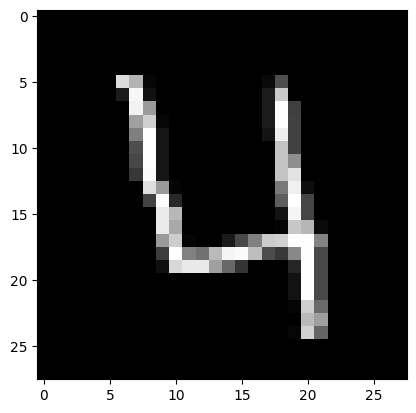

In [5]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 3
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
plt.imshow(image_data, cmap = "gray")

In [6]:
features

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

Break the data into Images and Labels

In [7]:
x = train.iloc[:,1:]
y = train['label']

In [8]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train Test Split of Images

In [9]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123 )

In [10]:
per = Perceptron(verbose = 2)
per.fit(x_train,y_train)
per_preds_train = per.predict(x_train)
per_preds_test = per.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.25 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.30 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.35 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [11]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  print("The model accuracy is: ", acc_score)
  print(conf_matrix)
  print(clas_rep)

In [12]:
model_eval(y_train,per_preds_train)

The model accuracy is:  0.8858333333333334
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93    

Multi layer Perceptron

In [13]:
mlp = MLPClassifier(hidden_layer_sizes = (16,16,16), verbose = True)

In [14]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 4.01428311
Iteration 2, loss = 1.89442334
Iteration 3, loss = 1.65550499
Iteration 4, loss = 1.47781946
Iteration 5, loss = 1.19996292
Iteration 6, loss = 0.93982745
Iteration 7, loss = 0.82938991
Iteration 8, loss = 0.75442445
Iteration 9, loss = 0.68890793
Iteration 10, loss = 0.64377461
Iteration 11, loss = 0.60762185
Iteration 12, loss = 0.57184837
Iteration 13, loss = 0.54974939
Iteration 14, loss = 0.51478982
Iteration 15, loss = 0.46800735
Iteration 16, loss = 0.43112570
Iteration 17, loss = 0.42108053
Iteration 18, loss = 0.40561824
Iteration 19, loss = 0.39498726
Iteration 20, loss = 0.38430814
Iteration 21, loss = 0.37558100
Iteration 22, loss = 0.36913256
Iteration 23, loss = 0.35932196
Iteration 24, loss = 0.35113727
Iteration 25, loss = 0.34789810
Iteration 26, loss = 0.34316306
Iteration 27, loss = 0.33903363
Iteration 28, loss = 0.33462376
Iteration 29, loss = 0.32910238
Iteration 30, loss = 0.32085847
Iteration 31, loss = 0.31816739
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=True)

In [15]:
preds_mlp_train = mlp.predict(x_train)
preds_mlp_test = mlp.predict(x_test)

In [16]:
model_eval(y_train, preds_mlp_train)

The model accuracy is:  0.9761011904761905
[[3307    0    1    4    4    2   19    0    7    3]
 [   0 3700   11    5    0    0    0    3   14    2]
 [  26    0 3255   23    6    0    1   10   16    2]
 [  39    0   31 3302    2   10    3   13   70   23]
 [   3    2    0    0 3218    0    1    2    3   47]
 [  17    0    0   29    1 2880   31    3   23   11]
 [   3    0    1    0    4    5 3247    0    7    0]
 [   1    5   19    8    8    1    0 3475    4   20]
 [  16    5    5   23    7   14    4    1 3156   15]
 [  11    0    0   38   13   11    0    9   22 3257]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3347
           1       1.00      0.99      0.99      3735
           2       0.98      0.97      0.98      3339
           3       0.96      0.95      0.95      3493
           4       0.99      0.98      0.98      3276
           5       0.99      0.96      0.97      2995
           6       0.98      0.99      0.99    

In [17]:
model_eval(y_test, preds_mlp_test)

The model accuracy is:  0.9286904761904762
[[758   0   3   0   1   3  13   1   5   1]
 [  0 919   8   5   3   1   1   0  11   1]
 [ 10   4 778  13   5   2   9   9   6   2]
 [  7   2  18 766   3  19   1  11  26   5]
 [  0   2   3   2 737   1   5   7   6  33]
 [  7   2   3  32   1 724  10   1  16   4]
 [  9   4   0   1   3   8 840   0   5   0]
 [  4   6  15   6   6   3   0 796   3  21]
 [ 15   5   6  15   6   4   7   2 742  15]
 [  4   1   0  15  27  11   0  22   6 741]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       785
           1       0.97      0.97      0.97       949
           2       0.93      0.93      0.93       838
           3       0.90      0.89      0.89       858
           4       0.93      0.93      0.93       796
           5       0.93      0.91      0.92       800
           6       0.95      0.97      0.96       870
           7       0.94      0.93      0.93       860
           8       0.90      0.91      

# Keras Implementation

Approach to creating models in Keras

1.   Initializing a model
     1. Sequential Model (Sequence of Layers)
     2. Functional Model (Multi modal, Transfer Learning)
2.   Set up the layers
     1. Dense Layers, Fully Connected Layers, MLP
     2. Dropout (Avoids overfitting)
3.   Compilation
     1. Optimizer (SGD, ADAM)
     2. Loss Function (Regression Loss Functions, Classification Loss Func)
     3. Metrics (Accuracy)
4.   Model Fit
     1. X & Y (Train and Test)
     2. Epochs (Number of iterations)
     3. Batch_Size = 128, 256 - Batch of images



In [18]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = (784,)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6514 (25.45 KB)
Trainable params: 6514 (25.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer = 'Adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [21]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [22]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(33600, 10)
(8400, 10)


In [23]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Understanding verbose:
https://chat.openai.com/share/f638075c-8ab0-4d0d-acc9-0db9b79f3f62

In [24]:
hist = model.fit(x_train, y_train_ohe, validation_data=(x_test, y_test_ohe), epochs = 250, verbose=2)

Epoch 1/250
1050/1050 - 10s - loss: 2.4979 - accuracy: 0.1610 - val_loss: 1.9335 - val_accuracy: 0.2892 - 10s/epoch - 10ms/step
Epoch 2/250
1050/1050 - 3s - loss: 1.7436 - accuracy: 0.3518 - val_loss: 1.6206 - val_accuracy: 0.3998 - 3s/epoch - 3ms/step
Epoch 3/250
1050/1050 - 3s - loss: 1.4010 - accuracy: 0.4810 - val_loss: 1.2197 - val_accuracy: 0.5655 - 3s/epoch - 3ms/step
Epoch 4/250
1050/1050 - 4s - loss: 1.1383 - accuracy: 0.5763 - val_loss: 1.0447 - val_accuracy: 0.6154 - 4s/epoch - 4ms/step
Epoch 5/250
1050/1050 - 4s - loss: 0.9616 - accuracy: 0.6483 - val_loss: 0.9136 - val_accuracy: 0.6905 - 4s/epoch - 4ms/step
Epoch 6/250
1050/1050 - 3s - loss: 0.8541 - accuracy: 0.6960 - val_loss: 0.8283 - val_accuracy: 0.7060 - 3s/epoch - 3ms/step
Epoch 7/250
1050/1050 - 3s - loss: 0.8025 - accuracy: 0.7076 - val_loss: 0.7989 - val_accuracy: 0.7215 - 3s/epoch - 3ms/step
Epoch 8/250
1050/1050 - 4s - loss: 0.7785 - accuracy: 0.7174 - val_loss: 0.7861 - val_accuracy: 0.7262 - 4s/epoch - 4ms/st

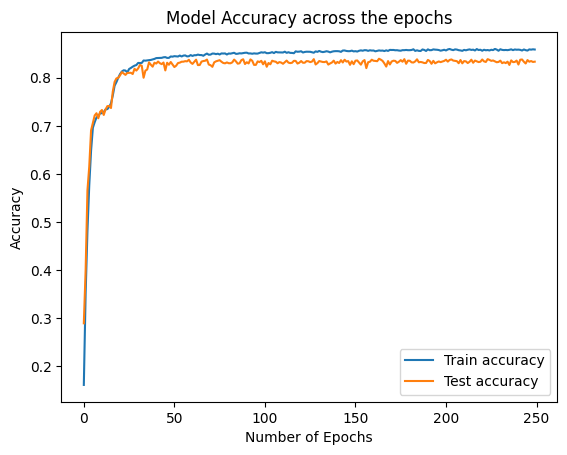

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across the epochs')
plt.legend(["Train accuracy", "Test accuracy"])
plt.show()

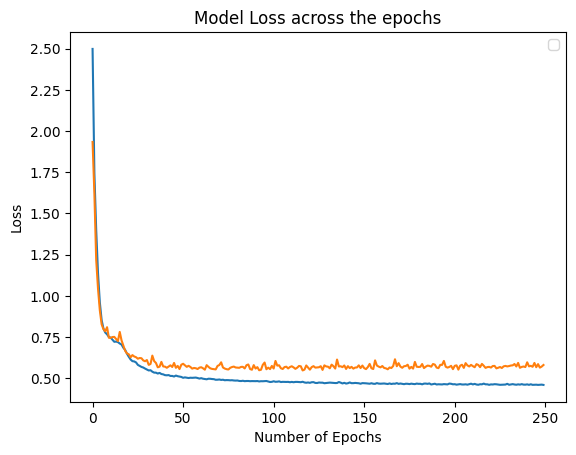

In [26]:
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss across the epochs')
plt.legend(["Train Loss", "Test Loss"])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

#### **Hyperparameters**
*To Achieve low bias , low variance and good speed we need to tune Hyperparameters*

1.   **Layers**
2.   **Neurons**
3. **Activation Functions**
4. **Optimizer**
5. **Loss Function**
6. **Batch size**
7. **Epochs/Iterations**



In [27]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (784,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer = 'Adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [30]:
hist = model.fit(x_train, y_train_ohe, validation_data=(x_test, y_test_ohe), epochs = 250, verbose=2)

Epoch 1/250
1050/1050 - 6s - loss: 1.5760 - accuracy: 0.8440 - val_loss: 0.4618 - val_accuracy: 0.9058 - 6s/epoch - 6ms/step
Epoch 2/250
1050/1050 - 3s - loss: 0.3378 - accuracy: 0.9212 - val_loss: 0.2975 - val_accuracy: 0.9294 - 3s/epoch - 3ms/step
Epoch 3/250
1050/1050 - 3s - loss: 0.2277 - accuracy: 0.9412 - val_loss: 0.2901 - val_accuracy: 0.9349 - 3s/epoch - 3ms/step
Epoch 4/250
1050/1050 - 3s - loss: 0.1898 - accuracy: 0.9483 - val_loss: 0.2518 - val_accuracy: 0.9318 - 3s/epoch - 3ms/step
Epoch 5/250
1050/1050 - 5s - loss: 0.1584 - accuracy: 0.9556 - val_loss: 0.2159 - val_accuracy: 0.9490 - 5s/epoch - 4ms/step
Epoch 6/250
1050/1050 - 4s - loss: 0.1453 - accuracy: 0.9590 - val_loss: 0.1945 - val_accuracy: 0.9510 - 4s/epoch - 4ms/step
Epoch 7/250
1050/1050 - 3s - loss: 0.1275 - accuracy: 0.9631 - val_loss: 0.1960 - val_accuracy: 0.9546 - 3s/epoch - 3ms/step
Epoch 8/250
1050/1050 - 3s - loss: 0.1183 - accuracy: 0.9668 - val_loss: 0.1937 - val_accuracy: 0.9555 - 3s/epoch - 3ms/step


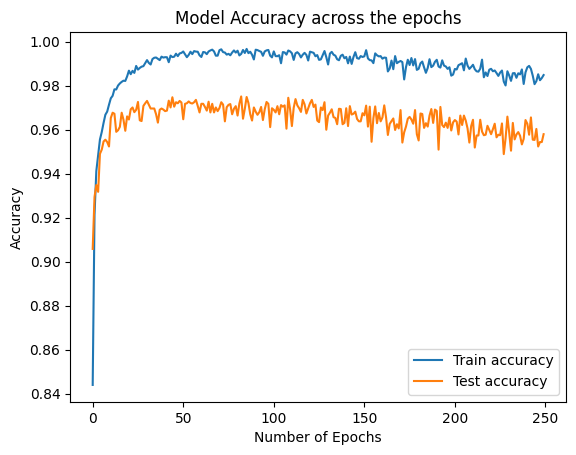

In [31]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across the epochs')
plt.legend(["Train accuracy", "Test accuracy"])
plt.show()

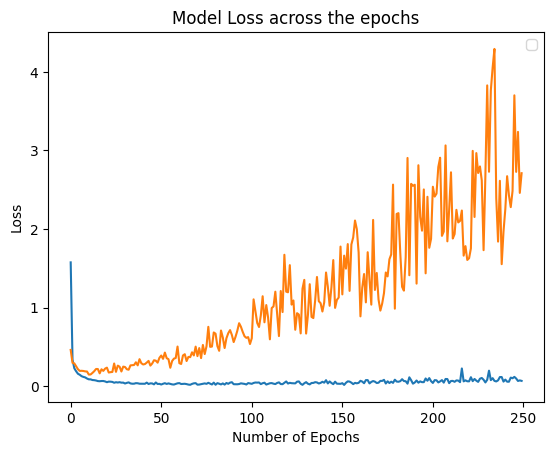

In [32]:
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss across the epochs')
plt.legend(["Train Loss", "Test Loss"])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [33]:
hist = model.fit(x_train, y_train_ohe, validation_data=(x_test, y_test_ohe), epochs = 250, batch_size = 64,verbose=2)

Epoch 1/250
525/525 - 3s - loss: 0.0485 - accuracy: 0.9884 - val_loss: 3.4621 - val_accuracy: 0.9625 - 3s/epoch - 6ms/step
Epoch 2/250
525/525 - 3s - loss: 0.0702 - accuracy: 0.9870 - val_loss: 2.8235 - val_accuracy: 0.9633 - 3s/epoch - 5ms/step
Epoch 3/250
525/525 - 2s - loss: 0.2216 - accuracy: 0.9893 - val_loss: 3.1631 - val_accuracy: 0.9607 - 2s/epoch - 4ms/step
Epoch 4/250
525/525 - 2s - loss: 0.0418 - accuracy: 0.9914 - val_loss: 5.1728 - val_accuracy: 0.9662 - 2s/epoch - 4ms/step
Epoch 5/250
525/525 - 2s - loss: 0.0414 - accuracy: 0.9929 - val_loss: 4.2186 - val_accuracy: 0.9657 - 2s/epoch - 4ms/step
Epoch 6/250
525/525 - 2s - loss: 0.0323 - accuracy: 0.9934 - val_loss: 4.8427 - val_accuracy: 0.9655 - 2s/epoch - 3ms/step
Epoch 7/250
525/525 - 2s - loss: 0.0406 - accuracy: 0.9917 - val_loss: 3.1371 - val_accuracy: 0.9626 - 2s/epoch - 4ms/step
Epoch 8/250
525/525 - 2s - loss: 0.0459 - accuracy: 0.9900 - val_loss: 2.6065 - val_accuracy: 0.9613 - 2s/epoch - 4ms/step
Epoch 9/250
525/

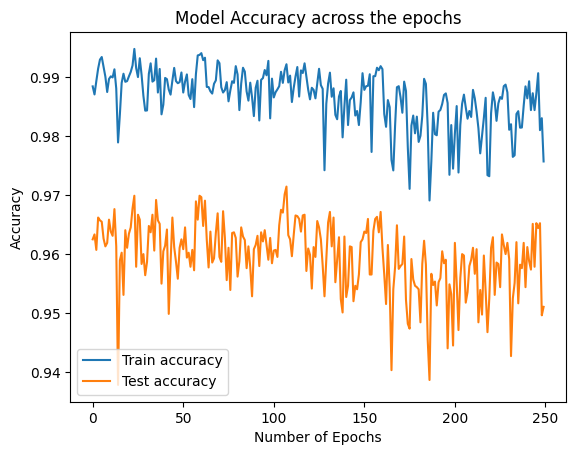

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across the epochs')
plt.legend(["Train accuracy", "Test accuracy"])
plt.show()

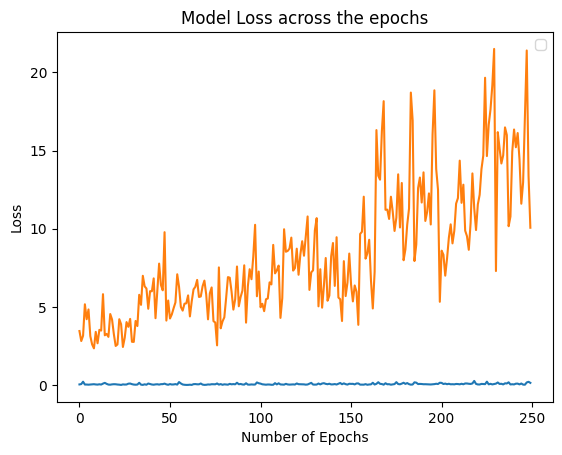

In [35]:
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss across the epochs')
plt.legend(["Train Loss", "Test Loss"])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])